In [1]:
# importing libraries
import pandas as pd
# import numpy as np
import seaborn as sns
import re
import time
!pip install contractions
import contractions
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 106 kB 5.3 MB/s 
     |████████████████████████████████| 287 kB 36.2 MB/s 


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
#loading dataset
train_data = pd.read_csv(r'/content/drive/MyDrive/NLP Projects/Basic ML Projects/Movie Review Classification/train.csv')
test_data = pd.read_csv(r'/content/drive/MyDrive/NLP Projects/Basic ML Projects/Movie Review Classification/test.csv')
print(len(train_data['text']))
print(len(test_data['text']))

# functions required
ps = PorterStemmer()
wn = WordNetLemmatizer()

25000
25000


In [4]:
print(train_data.info())
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       25000 non-null  object
 1   sentiment  25000 non-null  object
dtypes: object(2)
memory usage: 390.8+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       25000 non-null  object
 1   sentiment  25000 non-null  object
dtypes: object(2)
memory usage: 390.8+ KB
None


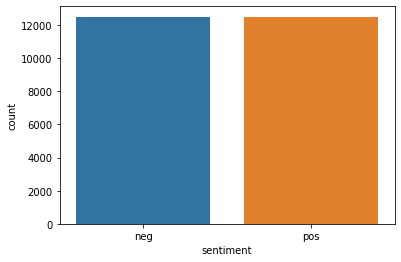

In [5]:
#checking the balance of classes.
sns.countplot(x='sentiment',data=train_data) #balanced

In [ ]:
#explanding contractions
x_data = train_data['text']
y_data = test_data['text']

def expand(text):
  e_words = []
  for word in text.split():
    e_words.append(contractions.fix(word))
  t = ' '.join(e_words)
  return t

a,b = [],[]
for line in x_data:
  a.append(expand(line))
for line in y_data:
  b.append(expand(line))

#example
print(x_data[0])
print(a[0])

Now, I won't deny that when I purchased this off eBay, I had high expectations. This was an incredible out-of-print work from the master of comedy that I so enjoy. However, I was soon to be disappointed. Apologies to those who enjoyed it, but I just found the Compleat Al to be very difficult to watch. I got a few smiles, sure, but the majority of the funny came from the music videos (which I've got on DVD) and the rest was basically filler. You could tell that this was not Al's greatest video achievement (that honor goes to UHF). Honestly, I doubt if this will ever make the jump to DVD, so if you're an ultra-hardcore Al fan and just HAVE to own everything, buy the tape off eBay. Just don't pay too much for it.
Now, I will not deny that when I purchased this off eBay, I had high expectations. This was an incredible out-of-print work from the master of comedy that I so enjoy. However, I was soon to be disappointed. Apologies to those who enjoyed it, but I just found the Compleat Al to be

In [ ]:
# cleaning and preprocessing text include stemming and lemmatization, removing stopwords.
def preprocess_stem(data):
    start = time.time()
    corpus = []
    for line in data:
        text = re.sub('[^a-zA-Z]', ' ', line)
        words = text.lower()
        words = word_tokenize(words)
        words = [ps.stem(word) for word in words if not word in set(stopwords.words('english'))]
        text = ' '.join(words)
        corpus.append(text)
    end = time.time()
    t = end-start
    min = time.strftime("%H:%M:%S", time.gmtime(t))
    print(f"Time taken to preprocess text using PorterStemmer {min}")
    return corpus


def preprocess_lem(data):
    start = time.time()
    corpus = []
    for line in data:
        text = re.sub('[^a-zA-Z]', ' ', line)
        words = text.lower()
        words = word_tokenize(words)
        words = [wn.lemmatize(word) for word in words if not word in set(stopwords.words('english'))]
        text = ' '.join(words)
        corpus.append(text)
    end = time.time()
    t = end-start
    min = time.strftime("%H:%M:%S", time.gmtime(t))
    print(f"Time taken to preprocess using WordNetLemmatizer {min}")
    return corpus

In [ ]:
# preprocessing train data using stemming
trainp_data = preprocess_stem(a)

Time taken to preprocess text using PorterStemmer 00:15:23


In [ ]:
# preprocessing train data using lemmatization
trainp_data = preprocess_lem(a)

Time taken to preprocess using WordNetLemmatizer 00:13:57


In [ ]:
#preprocessing test data using lemmatization
testp_data = preprocess_lem(b)

Time taken to preprocess using WordNetLemmatizer 00:13:41


In [ ]:
#combine the labels
x_label = pd.DataFrame(train_data['sentiment'])
y_label = pd.DataFrame(test_data['sentiment'])

df_trainp = pd.concat([trainp_data, x_label], axis=1)
df_testp = pd.concat([testp_data, y_label], axis=1)

df_trainp = df_trainp.rename(columns={'0': 'Text'})
df_testp = df_testp.rename(columns={'0':'Text'})

In [ ]:
#saving the data
df_trainp.to_csv('/content/drive/MyDrive/NLP Projects/Basic ML Projects/Movie Review Classification/trainp.csv', index=False)
df_testp.to_csv('/content/drive/MyDrive/NLP Projects/Basic ML Projects/Movie Review Classification/testp.csv', index=False)